#2301931251
Daffa Rizki Rizaly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
Data = {'x1': [1.0,1.5,3.0,5.0,3.5,4.5,3.5],
        'x2': [1.0,2.0,4.0,7.0,5.0,5.0,4.5]
       }
df = pd.DataFrame(Data,columns=['x1','x2'])
print(df)

    x1   x2
0  1.0  1.0
1  1.5  2.0
2  3.0  4.0
3  5.0  7.0
4  3.5  5.0
5  4.5  5.0
6  3.5  4.5


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[3.625 4.625 1.   ]
 [1.25  1.5   2.   ]
 [5.    7.    0.   ]]


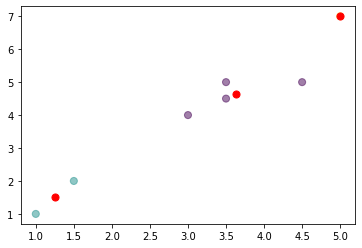

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x1'], df['x2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

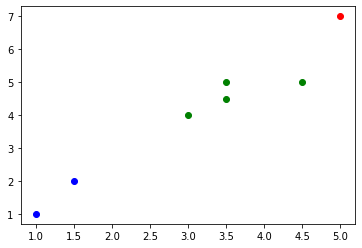

In [ ]:
#predictions from gmm
labels = gmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['x1', 'x2', 'cluster']

color=['red','green', 'blue']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["x1"],data["x2"],c=color[k])
plt.show()

Terlihat dari dua metode tersebut memiliki hasil yang sama. Secara teori GMM akan menghasilkan clustering yang lebih akurat karena dapat mengatasi outlier sedangkan k-means kurang tetapi karena data yang kecil dan tidak ada outlier hasil keduanya sama.